# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


載入 相關套件 並 執行 PCA 實驗 ...

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

載入digits資料集  
設定 模型 估計參數

In [94]:
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

np.random.seed(5)
%matplotlib inline

centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

確認資料筆數與內容

In [70]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (537, 64)
target (537,)
target_names (10,)
images (537, 8, 8)
DESCR


('images', (1797L, 8L, 8L))，共有 1797 張影像，影像大小為 8x8  
('data', (1797L, 64L))，data 則是將8x8的矩陣攤平成64個元素之一維向量  
('target_names', (10L,))，說明10種分類之對應 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
DESCR，資料之描述  
('target', (1797L,))，記錄1797張影像各自代表那一個數字  

資料建模 並 視覺化 結果

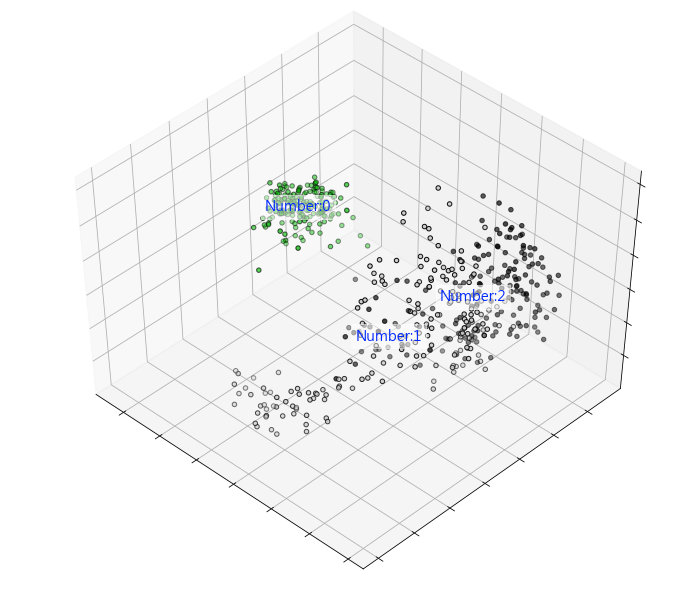

In [95]:
# Create a regular PCA model 
pca.fit(X)
X1 = pca.transform(X)

fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('Number:0', 0), ('Number:1', 1), ('Number:2', 2)]:
    ax.text3D(X1[y == label, 0].mean(),
              X1[y == label, 1].mean() + 1.5,
              X1[y == label, 2].mean(), name,
              color='#0028ff',             #設定字體顏色
              size=14,                     #設定字型大小
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w')
             )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([''])

plt.show()

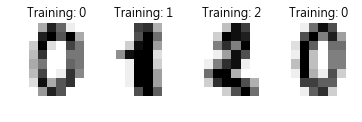

In [24]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [25]:
images_and_labels

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0.,  0.,

In [23]:
digits.target

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,